**1. Import Library**

In [1]:
# Import required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer

**2. Load Dataset**

In [2]:
# Load data
data = load_breast_cancer()

# Converting data into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**3. Data Processing**

In [3]:
# Display general information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

In [4]:
# Check for missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


**4. Exploratory Data Analysis (EDA)**

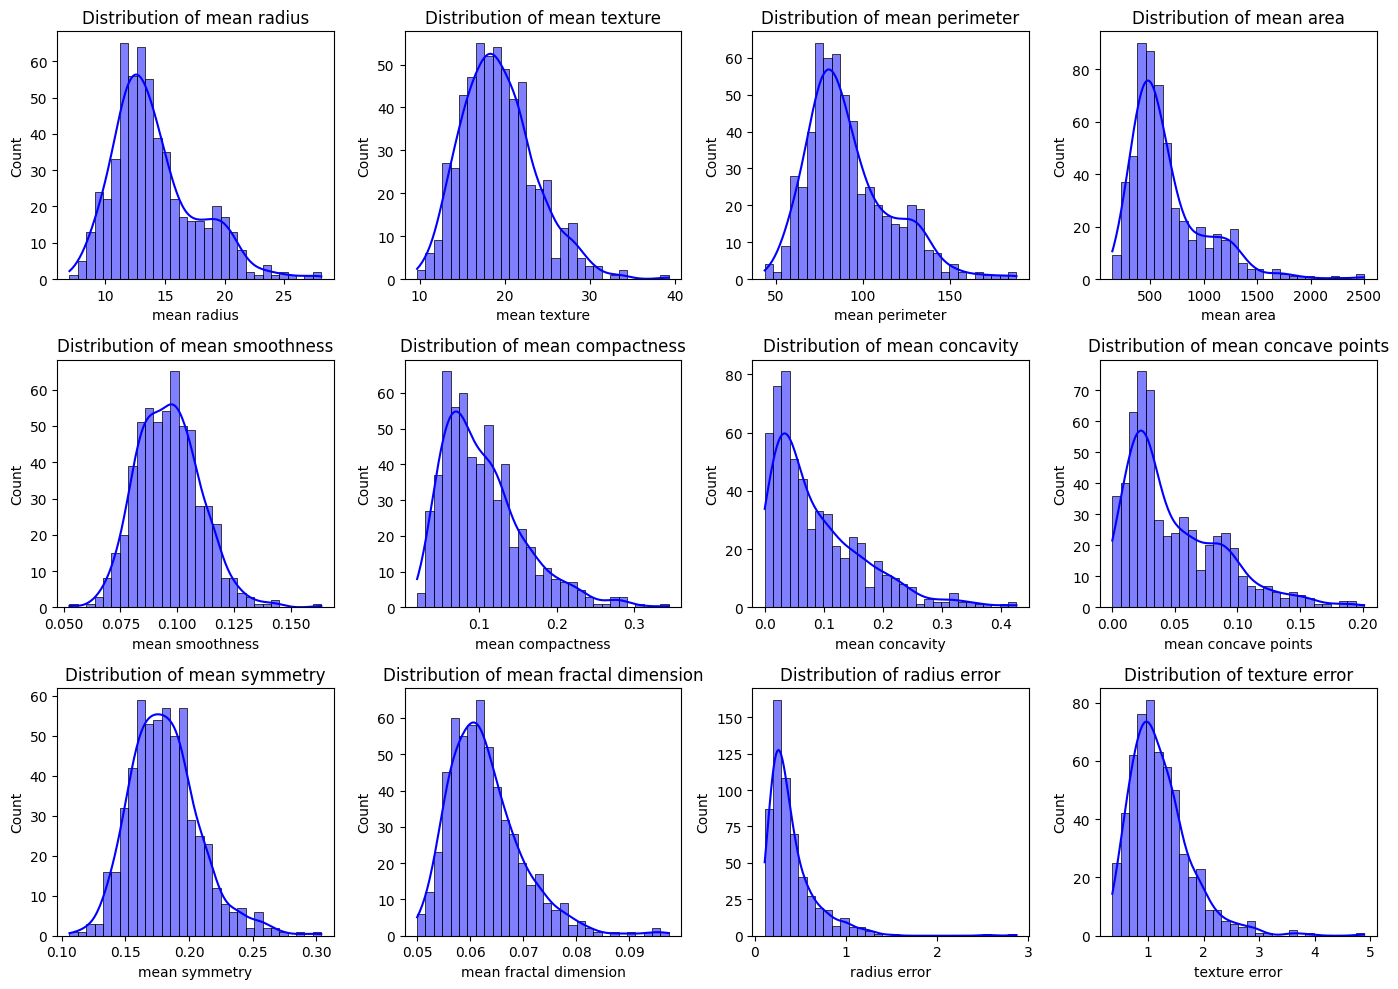

In [5]:
# Ensure that we are only selecting numerical features
num_features = df.select_dtypes(include=[np.number])

# Create distribution plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns[:12], 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

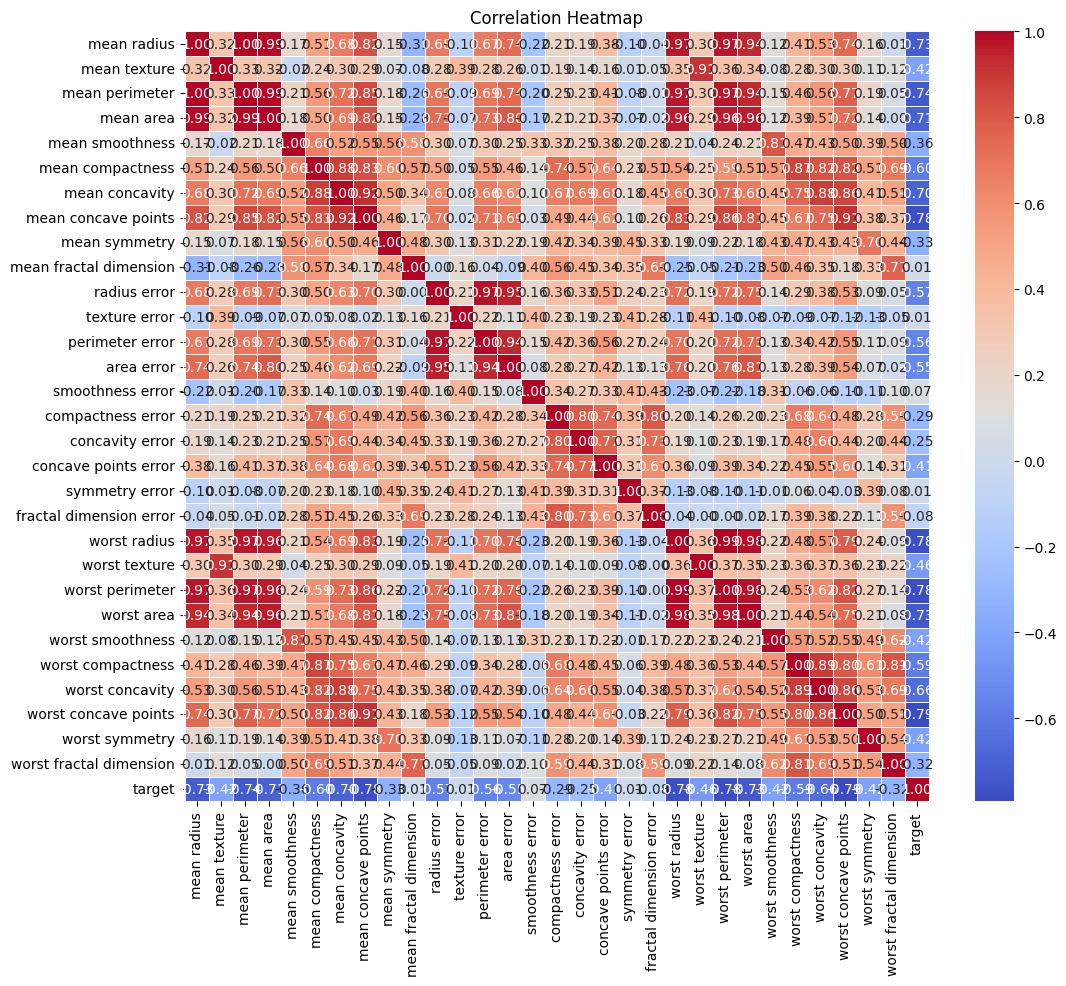

In [6]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-7-0f2f55cb3220>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Purples')


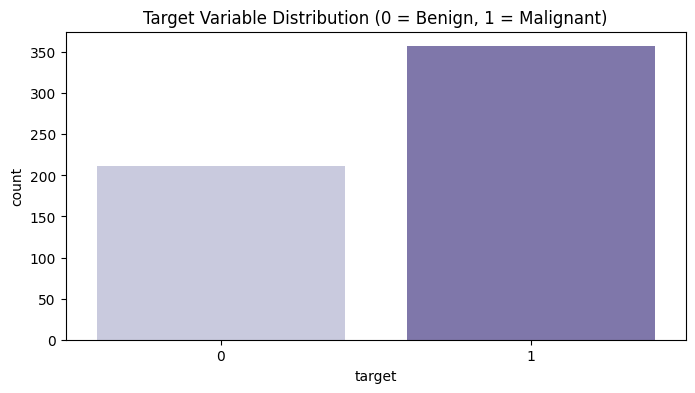

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df, palette='Purples')
plt.title('Target Variable Distribution (0 = Benign, 1 = Malignant)')
plt.show()

**5. Data Splitting**

In [8]:
# Split features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Normalize all numeric columns
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets to ensure the split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(455, 30), y_train=(455,)
Test set shape: X_test=(114, 30), y_test=(114,)


**6. Model Training**

In [9]:
# Model Training
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training is complete.")

Model training is complete.


**7. Feature Importance**

<ipython-input-10-a549f38cfdb3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


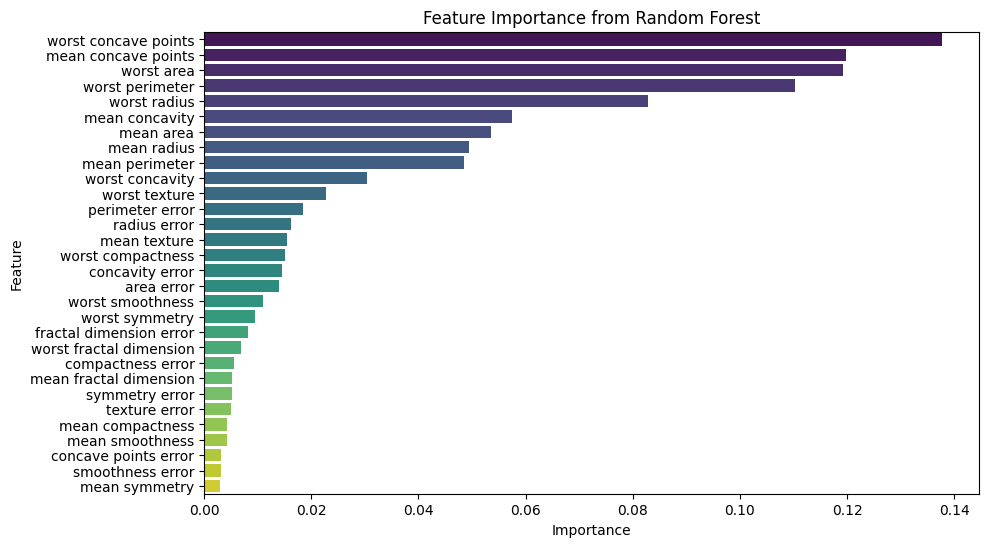

In [10]:
# Feature importance attributes
feature_importance_rf = rf.feature_importances_

# Display feature importance from RandomForest
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Visualize Feature Importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**8. Model Evaluation**

In [14]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    # Predictions with the model
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

In [15]:
# Evaluate each model and collect the results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

In [16]:
# Create DataFrame to summarize the results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


In [17]:
# Fill DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.956140   0.934211  1.000000  0.965986
1            Decision Tree (DT)  0.947368   0.957746  0.957746  0.957746
2            Random Forest (RF)  0.964912   0.958904  0.985915  0.972222
3  Support Vector Machine (SVM)  0.947368   0.922078  1.000000  0.959459
4              Naive Bayes (NB)  0.973684   0.959459  1.000000  0.979310


**9. Conclusion**

Berdasarkan hasil evaluasi berbagai algoritma klasifikasi pada dataset yang digunakan, berikut adalah analisis dari metrik Accuracy, Precision, Recall, dan F1-Score:

1. Naive Bayes (NB) memiliki performa terbaik dengan akurasi tertinggi (0.973684) dan F1-score tertinggi (0.979310), menunjukkan model ini mampu mengklasifikasikan data dengan sangat baik.
2. Random Forest (RF) juga menunjukkan performa tinggi dengan akurasi 0.964912 dan F1-score 0.972222, menjadikannya pilihan yang sangat baik untuk klasifikasi.
3. K-Nearest Neighbors (KNN) memiliki akurasi 0.956140 dengan Recall 1.0, menandakan model ini sangat baik dalam menangkap semua sampel positif tanpa kesalahan.
4. Support Vector Machine (SVM) dan Decision Tree (DT) memiliki akurasi 0.947368, yang sedikit lebih rendah dibandingkan model lainnya, tetapi tetap menunjukkan kinerja yang baik.
Semua model memiliki Recall 1.0 atau mendekati, yang berarti model dapat mengenali semua sampel dari kelas positif dengan baik.

- Naive Bayes (NB) dan Random Forest (RF) adalah model terbaik dalam eksperimen ini, dengan kombinasi akurasi tinggi dan keseimbangan antara Precision, Recall, serta F1-Score.
- Jika tujuan utama adalah menghindari kesalahan klasifikasi, Naive Bayes (NB) menjadi pilihan terbaik.
- Namun, jika dibutuhkan model yang lebih fleksibel dan dapat menangani data lebih kompleks, Random Forest (RF) dapat menjadi alternatif yang baik.